In [96]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from functools import reduce
from sklearn import preprocessing
import warnings
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
from lazypredict.Supervised import LazyRegressor, LazyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Options and warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


In [97]:
df=pd.read_csv("../csv/diabetes_012_health_indicators_BRFSS2015.csv")

In [98]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [99]:
df=df.astype(int)

In [100]:
df.genhlth.value_counts()

genhlth
2    89084
3    75646
1    45299
4    31570
5    12081
Name: count, dtype: int64

In [101]:
columns=df.columns.to_list()
for column in columns:
    print(column,df[column].unique())

diabetes_012 [0 2 1]
highbp [1 0]
highchol [1 0]
cholcheck [1 0]
bmi [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
smoker [1 0]
stroke [0 1]
heartdiseaseorattack [0 1]
physactivity [0 1]
fruits [0 1]
veggies [1 0]
hvyalcoholconsump [0 1]
anyhealthcare [1 0]
nodocbccost [0 1]
genhlth [5 3 2 4 1]
menthlth [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
physhlth [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
diffwalk [1 0]
sex [0 1]
age [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
education [4 6 3 5 2 1]
income [3 1 8 6 4 7 2 5]


In [102]:
df.shape

(253680, 22)

In [103]:
target=df.pop("diabetes_012")

In [104]:
df["diagnosis"]=target

In [105]:
df.shape

(253680, 22)

In [106]:
df=df[["bmi","genhlth","menthlth","physhlth","age","education","income","highbp","highchol","cholcheck","smoker","stroke","heartdiseaseorattack","physactivity","fruits","veggies","hvyalcoholconsump","anyhealthcare","nodocbccost","diffwalk","sex","diagnosis"]]

In [107]:
df.shape

(253680, 22)

In [108]:
df.head()

,bmi,genhlth,menthlth,physhlth,age,education,income,highbp,highchol,cholcheck,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,diffwalk,sex,diagnosis
0,40,5,18,15,9,4,3,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0
1,25,3,0,0,7,6,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,28,5,30,30,9,4,8,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0
3,27,2,0,0,11,3,6,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0
4,24,2,3,0,11,5,4,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0


# <h1 style="color: #FF8C00;">Data Preprocessing </h1>

## <h2 style="color: #FF6347;">X-Y Split</h2>

In [109]:
df.head()

,bmi,genhlth,menthlth,physhlth,age,education,income,highbp,highchol,cholcheck,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,diffwalk,sex,diagnosis
0,40,5,18,15,9,4,3,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0
1,25,3,0,0,7,6,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,28,5,30,30,9,4,8,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0
3,27,2,0,0,11,3,6,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0
4,24,2,3,0,11,5,4,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0


In [110]:
y=df.diagnosis
X=df.drop(columns=["diagnosis"])

In [111]:
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    2
253677    0
253678    0
253679    2
Name: diagnosis, Length: 253680, dtype: int64

# <h1 style="color: #FF8C00;">Modeling</h1>

## <h2 style="color: #FF6347;">Train-Test Split</h2>

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [113]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 253680.
70% for training data: 177576.
30% for test data: 76104.


## <h2 style="color: #FF6347;">Classification Model Selection</h2>

Since our target variable has three distinct values, we cannot perform logistic regression on it directly. Instead, we will use KNN for the model. Later, we will attempt to binarize the target variable by combining prediabetes and diabetes into a single category. This will allow us to evaluate whether logistic regression performs better in this adjusted scenario.

## <h2 style="color: #FF6347;">Decision Tree Classifier</h2>

In [114]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

In [115]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92     64180
           1       0.00      0.00      0.00      1425
           2       0.00      0.00      0.00     10499

    accuracy                           0.84     76104
   macro avg       0.28      0.33      0.31     76104
weighted avg       0.71      0.84      0.77     76104



## <h2 style="color: #FF6347;">Linear SVC</h2>

In [116]:
model = LinearSVC()
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

In [117]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     64180
           1       0.00      0.00      0.00      1425
           2       0.58      0.09      0.15     10499

    accuracy                           0.85     76104
   macro avg       0.48      0.36      0.36     76104
weighted avg       0.80      0.85      0.79     76104



In [118]:
len(X_train)

177576

## <h2 style="color: #FF6347;">KNN</h2>

Debido seguramente a la data, el modelo no termina de entrenar

In [119]:
#model = KNeighborsClassifier(n_neighbors=20)
#model = model.fit(X_train, y_train)
#predictions = model.predict(X_test)

In [120]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     64180
           1       0.00      0.00      0.00      1425
           2       0.58      0.09      0.15     10499

    accuracy                           0.85     76104
   macro avg       0.48      0.36      0.36     76104
weighted avg       0.80      0.85      0.79     76104



# <h1 style="color: #FF8C00;">Binarizing the Target</h1>

Since the prediabetes condition in the target variable represents a very low number of cases, we are mapping them as diabetes. We will test if this improves our models' performance, as they currently cannot distinguish between the two conditions.

In [121]:
df.diagnosis.value_counts()

diagnosis
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [122]:
df.diagnosis= df.diagnosis.replace(2,1)

In [123]:
df.diagnosis.value_counts()

diagnosis
0    213703
1     39977
Name: count, dtype: int64

## <h1 style="color: #FF8C00;">Downsampling</h1>

In [124]:
non_diabetes=df[df["diagnosis"]==0]

diabetes=df[df["diagnosis"]==1]

non_diabetes=non_diabetes.sample(39977)

df=pd.concat([diabetes,non_diabetes])

In [125]:
y=df.diagnosis
X=df.drop(columns=["diagnosis"])

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Since we binarized the target variable, we are now able to perform the Logistic Regression model and compare it with the others.

## <h2 style="color: #FF6347;">Logistic Regression</h2>

In [127]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [128]:
predictions=model.predict(X_test)

In [129]:
print(f'30% for test prediction data: {len(predictions)}.')

30% for test prediction data: 23987.


In [130]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     11964
           1       0.73      0.76      0.75     12023

    accuracy                           0.74     23987
   macro avg       0.74      0.74      0.74     23987
weighted avg       0.74      0.74      0.74     23987



In [131]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

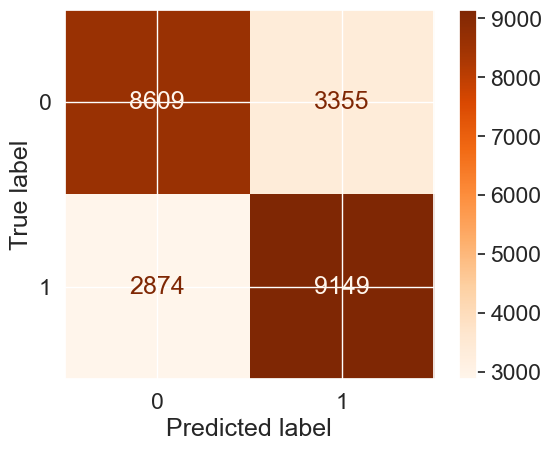

In [132]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

## <h2 style="color: #FF6347;">Decision Trees (tree-based)</h2>

In [133]:
model = DecisionTreeClassifier(max_depth=8)
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

In [134]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73     11964
           1       0.72      0.78      0.75     12023

    accuracy                           0.74     23987
   macro avg       0.74      0.74      0.74     23987
weighted avg       0.74      0.74      0.74     23987



In [135]:
print("Test data accuracy: ",model.score(X_test,y_test))
print("Train data accuracy: ", model.score(X_train, y_train))

Test data accuracy:  0.7378996956684871
Train data accuracy:  0.7476906033912841


In [136]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

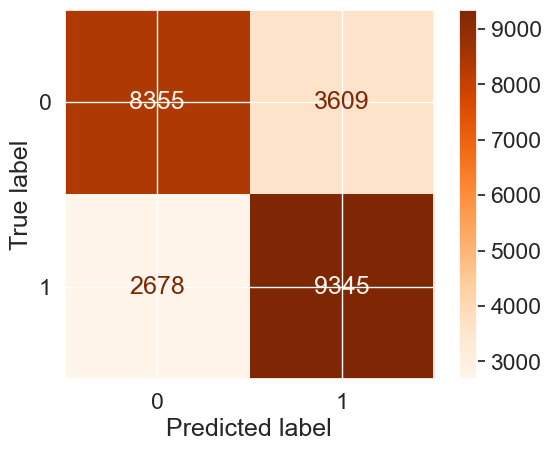

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

In [138]:
max_depth = range(1, 30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

In [139]:
import plotly.graph_objs as go

In [140]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(max_depth), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(max_depth), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Accuracy', yaxis_title='Max Tree Depth', title='')
fig.show()

## DE NUEVO SOLO MIRAMOS EL TESTING ACCURACY

clf = LazyClassifier(verbose=1, ignore_warnings=True,custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)


## <h2 style="color: #FF6347;">KNN</h2>

In [141]:
model = KNeighborsClassifier(n_neighbors=11)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [142]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71     11964
           1       0.71      0.76      0.73     12023

    accuracy                           0.72     23987
   macro avg       0.72      0.72      0.72     23987
weighted avg       0.72      0.72      0.72     23987



In [143]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

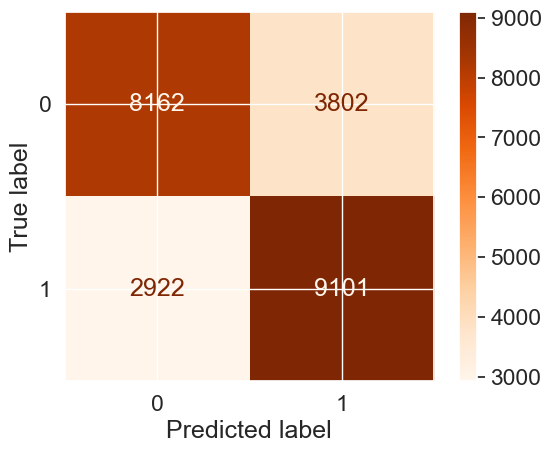

In [144]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

I wanted to apply hyperparameter tuning, but I couldn't as the cell in the loop wouldn't finish running for the KNN model.

## <h2 style="color: #FF6347;">Support Vector Machine</h2>

In [145]:
model = LinearSVC()
model = model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)

In [146]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     11964
           1       0.73      0.77      0.75     12023

    accuracy                           0.74     23987
   macro avg       0.74      0.74      0.74     23987
weighted avg       0.74      0.74      0.74     23987



In [147]:
cm = confusion_matrix(y_test, predictions)

<Figure size 800x600 with 0 Axes>

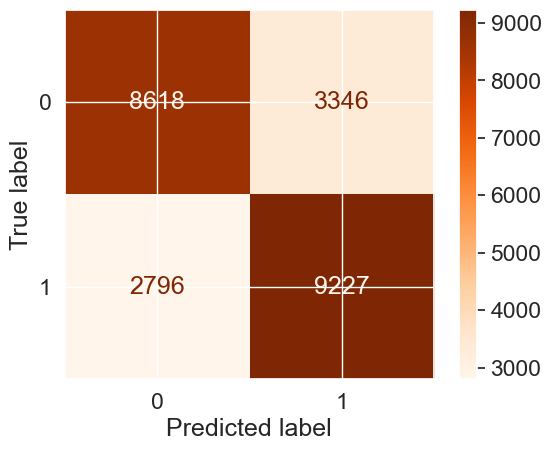

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Oranges')  
plt.grid(True)
plt.show()

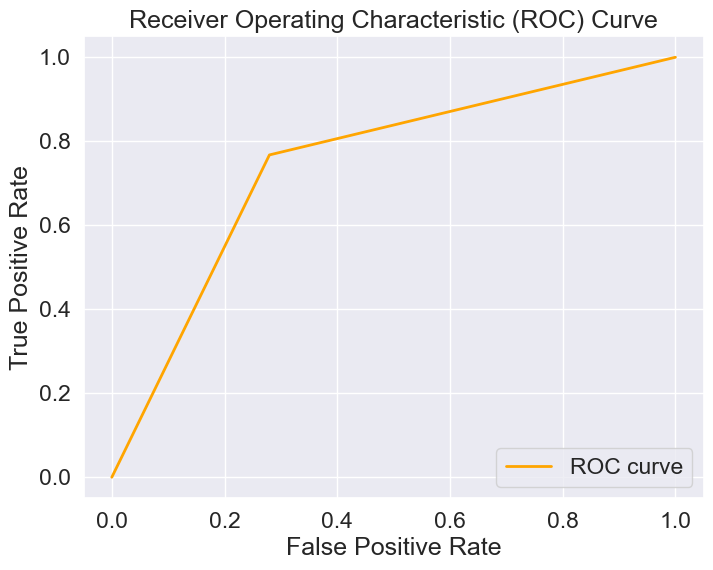

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, predictions, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## RECUERDA QUE ESTA CURVA SOLO ES LA DEL ÚLTIMO MODELO

## <h2 style="color: #FF6347;">XGBoost Classifier</h2>

In [150]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [151]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     11964
           1       0.73      0.77      0.75     12023

    accuracy                           0.74     23987
   macro avg       0.74      0.74      0.74     23987
weighted avg       0.74      0.74      0.74     23987



# <h1 style="color: #FF8C00;">Normalizing</h1>

Since the best model performances has been with SVM and XGBoost, we are trying now to normalize the distribution of the unique "continuous" variable in the dataset; the Body Mass Index. 

## <h2 style="color: #FF6347;">MinMaxScaler</h2>

In [152]:
scaler = MinMaxScaler()

In [153]:
X_train_scaled = scaler.fit_transform(X_train) ## SOlo transformamos las features! no la target, ya que no 
X_test_scaled = scaler.fit_transform(X_test)   ## podemos cambiar su magnitud, e igualmente el potencial de predicción
                                                ## permanece sobre "X"

In [154]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [155]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74     11964
           1       0.74      0.76      0.75     12023

    accuracy                           0.75     23987
   macro avg       0.75      0.75      0.75     23987
weighted avg       0.75      0.75      0.75     23987



## <h2 style="color: #FF6347;">StandardScaler</h2>

In [156]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
X_train_scaled = scaler.fit_transform(X_train) ## SOlo transformamos las features! no la target, ya que no 
X_test_scaled = scaler.fit_transform(X_test)   ## podemos cambiar su magnitud, e igualmente el potencial de predicción
                                                ## permanece sobre "X"

In [158]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [159]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.92      0.71     11964
           1       0.81      0.35      0.49     12023

    accuracy                           0.63     23987
   macro avg       0.70      0.63      0.60     23987
weighted avg       0.70      0.63      0.60     23987



## <h2 style="color: #FF6347;">Log Transform</h2>

In [160]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [161]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train_log, y_train)

predictions = model.predict(X_test_log)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [162]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.71      0.73     11964
           1       0.73      0.78      0.76     12023

    accuracy                           0.75     23987
   macro avg       0.75      0.75      0.74     23987
weighted avg       0.75      0.75      0.74     23987



# <h1 style="color: #FF8C00;">Dropping columns</h1>

In [163]:
df.head()

,bmi,genhlth,menthlth,physhlth,age,education,income,highbp,highchol,cholcheck,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,diffwalk,sex,diagnosis
8,30,5,30,30,9,5,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1
10,25,3,0,0,13,6,8,0,0,1,1,0,0,1,1,1,0,1,0,0,1,1
13,28,4,0,0,11,4,6,1,1,1,0,0,0,0,0,1,0,1,0,1,0,1
17,23,2,0,0,7,5,6,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1
23,27,1,0,0,13,5,4,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1


In [164]:
num_corr = df.corr().round(2)

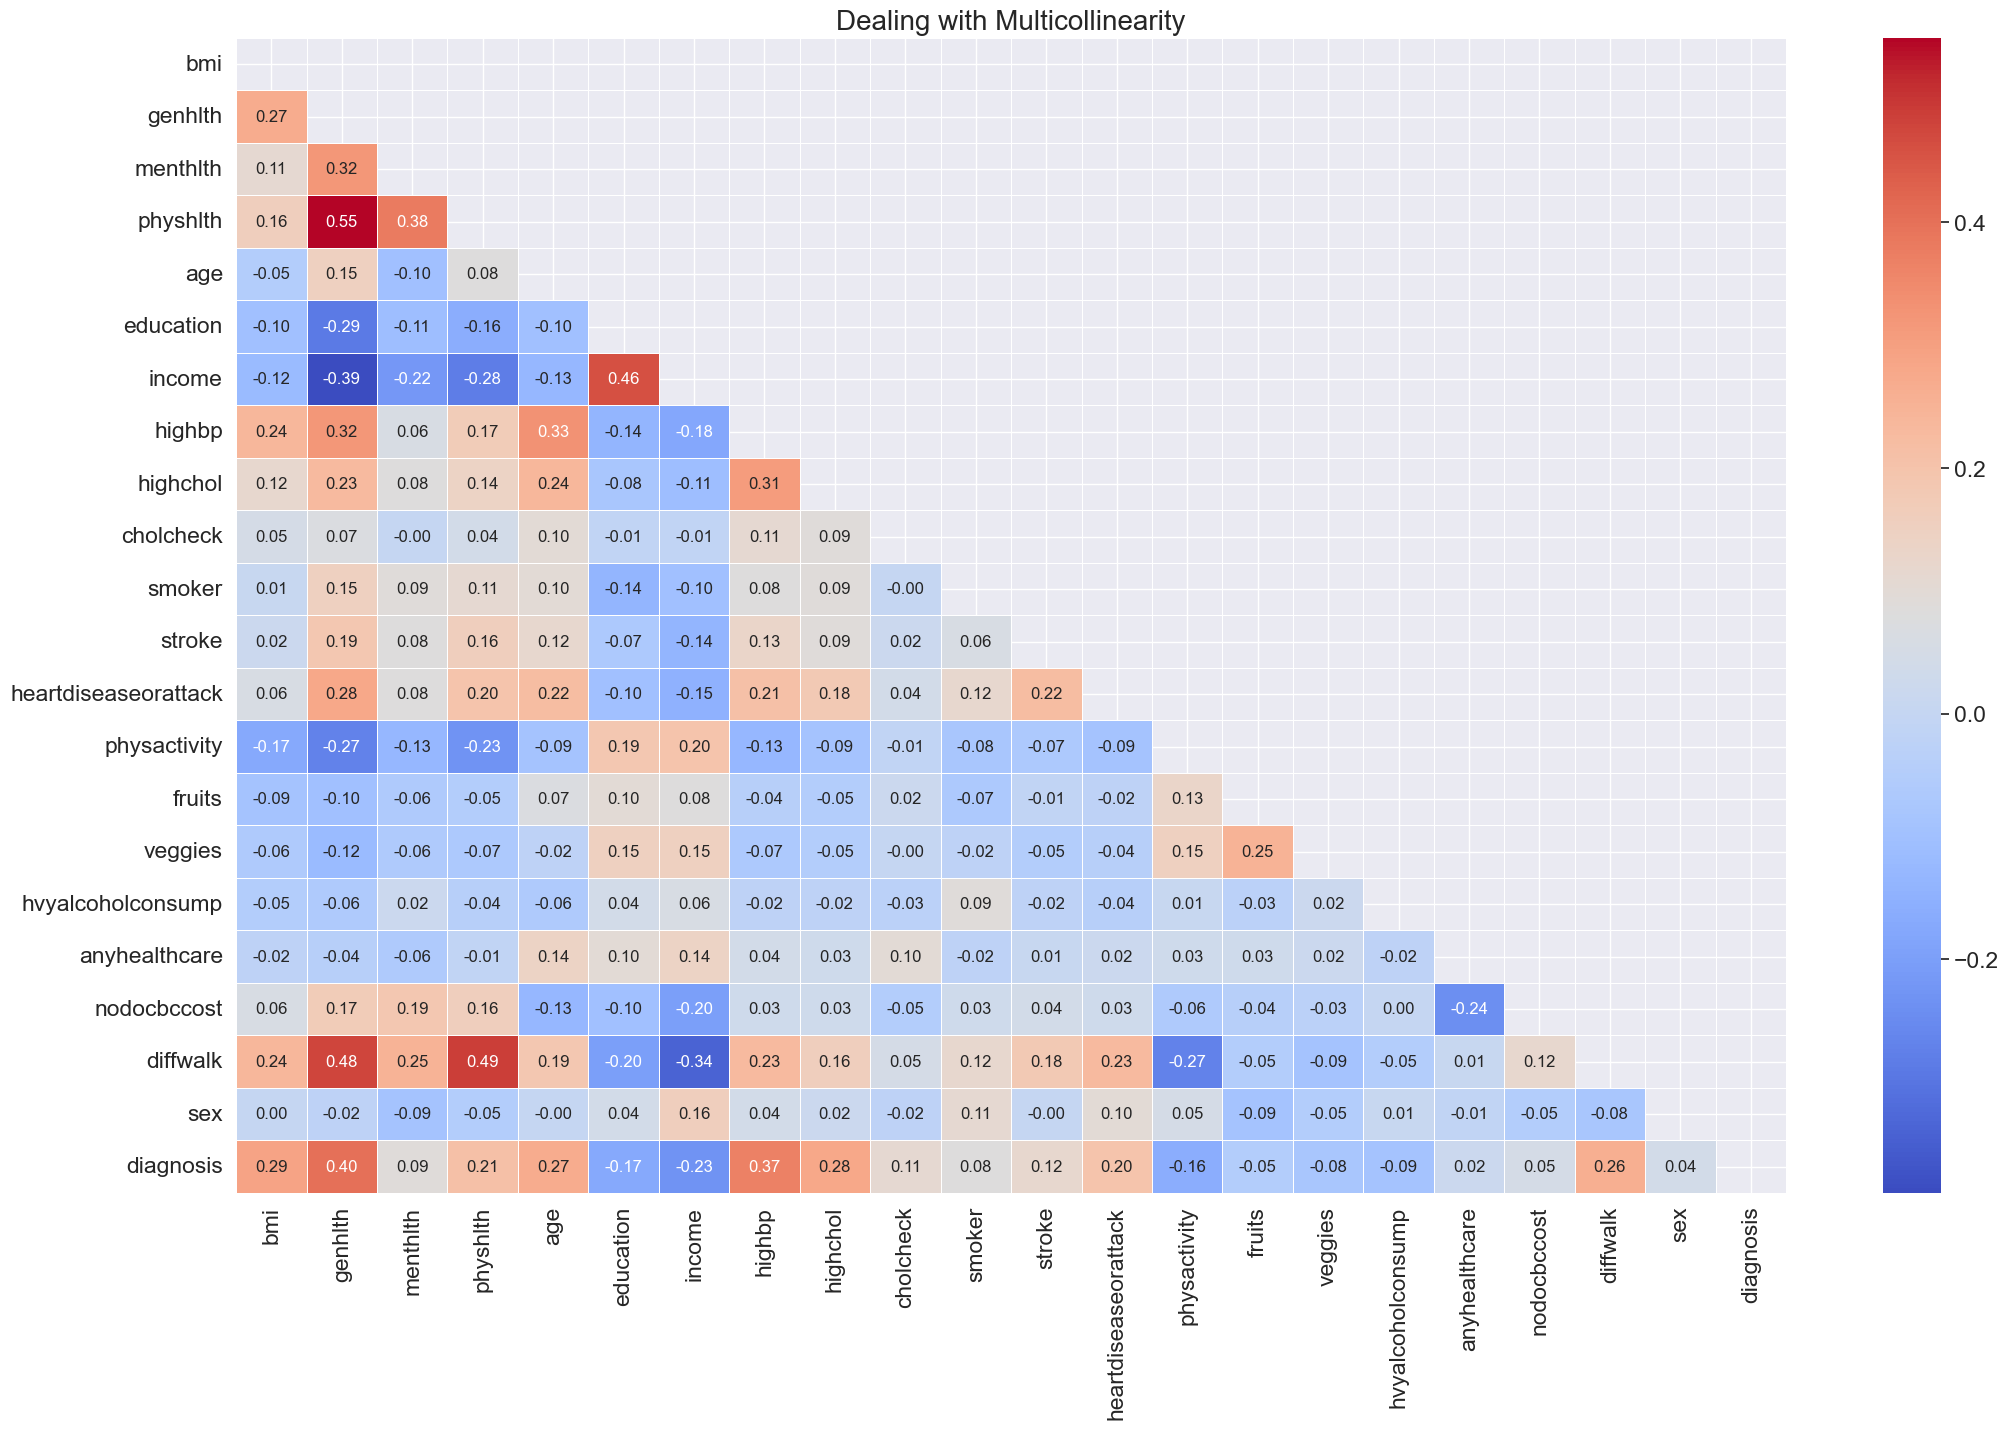

In [165]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [166]:
df2=df.copy()

In [167]:
df2=df2.drop(columns=["menthlth","physhlth"])

In [168]:
df2=df2.drop(columns=["education","diffwalk","fruits"])

In [169]:
df2.head()

,bmi,genhlth,age,income,highbp,highchol,cholcheck,smoker,stroke,heartdiseaseorattack,physactivity,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,sex,diagnosis
8,30,5,9,1,1,1,1,1,0,1,0,1,0,1,0,0,1
10,25,3,13,8,0,0,1,1,0,0,1,1,0,1,0,1,1
13,28,4,11,6,1,1,1,0,0,0,0,1,0,1,0,0,1
17,23,2,7,6,0,0,1,1,0,0,1,0,0,1,0,1,1
23,27,1,13,4,1,0,1,0,0,0,1,1,0,1,0,0,1


In [170]:
y=df2.diagnosis
X=df2.drop(columns=["diagnosis"])

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## <h2 style="color: #FF6347;">XGBoost Classifier</h2>

In [172]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [173]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.71      0.73     11964
           1       0.73      0.78      0.76     12023

    accuracy                           0.75     23987
   macro avg       0.75      0.75      0.74     23987
weighted avg       0.75      0.75      0.74     23987



## <h2 style="color: #FF6347;">Log Transform</h2>

In [174]:
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [175]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train_log, y_train)

predictions = model.predict(X_test_log)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [176]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     11964
           1       0.72      0.79      0.76     12023

    accuracy                           0.74     23987
   macro avg       0.75      0.74      0.74     23987
weighted avg       0.75      0.74      0.74     23987



In [177]:
series_pred = pd.Series(predictions, name='predictions')

In [178]:
series_y_test = pd.Series(y_test, name='actual')

In [179]:
comparison_df = pd.concat([series_y_test.reset_index(drop=True), series_pred], axis=1)

In [180]:
comparison_df.head(20)

,actual,predictions
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


# <h1 style="color: #FF8C00;">Cross Validation</h1>

In [86]:
# Support Vector Machine
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit model
rf_model = RandomForestClassifier(max_depth=3, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72     11964
           1       0.72      0.77      0.74     12023

    accuracy                           0.73     23987
   macro avg       0.74      0.73      0.73     23987
weighted avg       0.74      0.73      0.73     23987



In [181]:
# Applying an example of cross validation
from sklearn.model_selection import cross_validate

# Initialize model and cross validate with 10 folds
results = cross_validate(rf_model, X, y, cv=10)
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_score'])


In [182]:
# Review test scores per validation set
results['test_score']

array([0.73011506, 0.72211106, 0.73674337, 0.72798899, 0.72970607,
       0.72620388, 0.73070669, 0.73771107, 0.73495935, 0.73383365])

In [183]:
# Review overall test score
results['test_score'].mean()

np.float64(0.7310079179677393)

In [184]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up the cross validator
cv_sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cv_sss.get_n_splits(X, y)

5

In [185]:
# Check what the stratified shuffle split does
for i, (train_indices, test_indices) in enumerate(cv_sss.split(X, y)):
    print('Split no:', i)
    print('Train indices:', train_indices[:5])
    print('Test indices:', test_indices[:5])

Split no: 0
Train indices: [  336 34641 49444 71303 24128]
Test indices: [21092  9813 65518  2043 18722]
Split no: 1
Train indices: [  273 31511 77658 66044  8140]
Test indices: [44363 25716 35780 60122 17673]
Split no: 2
Train indices: [46790 19937 22528 20390 18463]
Test indices: [54455 27712 66030 71383 29896]
Split no: 3
Train indices: [28923 42329 66764 33815 14306]
Test indices: [76194 68937 69947 63503 45282]
Split no: 4
Train indices: [15142  8170   243 51528 23512]
Test indices: [73412 65993 23562 64712  8729]
